<a href="https://colab.research.google.com/github/sabbir179/practiceWithPython/blob/main/HandwrittenDigitsDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraries
import pandas as pd                                    # For dataframes
import numpy as np                                     # For various functions
import matplotlib.pyplot as plt                        # For plotting functions
import seaborn as sns                                  # For additional plotting functions
from sklearn.model_selection import train_test_split # For train / test splits

LOAD AND PREPARE DATA
source: ML reporsitory at the University of California

In [3]:
df = pd.read_csv(
       'https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', 
        header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


## Rename Variables
  - Sequentially renames all attribute columns (i.e. pixel data) as P0, P2, etc
  - Renames the class variable as y


In [5]:
df.columns = ["P" + str(i) for i in range(0, len(df.columns) -1)] + ["y"]

- Select cases for the digits {1, 2, 3}.
- Look at the first 5 rows

In [6]:
df = df.loc[df.y.isin([1,3,6])]
df.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
11,0,0,0,3,16,11,1,0,0,0,...,0,0,0,0,2,14,14,1,0,1
14,0,0,7,11,11,6,0,0,0,9,...,0,0,0,14,16,12,10,1,0,3
24,0,0,9,13,1,0,0,0,0,0,...,5,0,0,4,15,16,16,16,16,1
27,0,0,0,10,12,0,0,0,0,0,...,0,0,0,1,11,14,12,1,0,6


### Split Data 
- trian_test_split() splits the data into training and testing sets.

- Specify the data matrix X, which contraints the attributes of the pixel data.

- Extract columns P0, P2, ..., P63 with df.filter(regex='\d'), which will keep only names with a numeric digits in them.

- Specify the target variables as df.y

- Create the trn and tst dataframes

In [7]:
# Renames Columns
X_trn, X_tst, y_trn, y_tst = train_test_split(
    df.filter(regex='\d'),  
    df.y, 
    test_size=0.30,
    random_state=1)

# Creates the training dataset, trn
trn = X_trn
trn["y"] = y_trn

# Creates the testing dataset, tst
tst = X_tst
tst["y"] = y_tst

### EXPLORE TRAINING DATA

## Display Images

Display the images of the first 20 digits of x_train

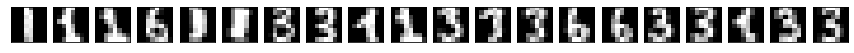

In [8]:
# Sets up a grid for the images
fig, ax = plt.subplots(
    nrows=1, 
    ncols=20, 
    figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))

# Plots 20 digits
for i in np.arange(20):
    ax[i].imshow(X_trn.to_numpy()[i, 0:-1].reshape(8, 8), cmap=plt.cm.gray)   
plt.show()

### Explore Attribute Variables 
Select four arbitrary features (any four will do) and get paired plots.

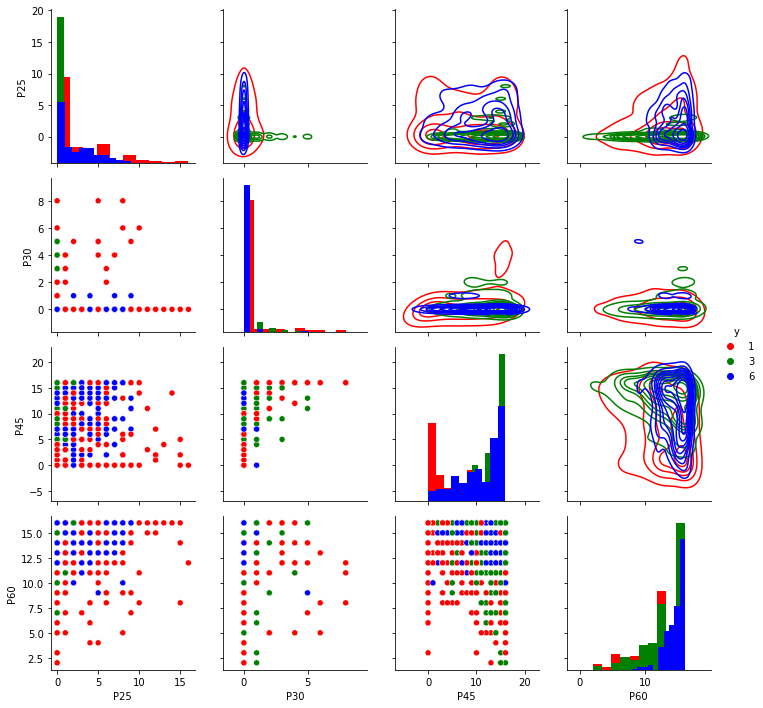

In [9]:
# Create a grid using Seaborn's PairGrid()
g = sns.PairGrid(
    trn,
    vars = ["P25", "P30", "P45", "P60"],
    hue="y",
    diag_sharey=False,
    palette=["red", "green", "blue"]
)

# adds histograms on the diagonal
g.map_diag(plt.hist)

#Adds density plots above the diagonal
g.map_upper(sns.kdeplot)

#Adds scatterplots below the diagonal
g.map_lower(sns.scatterplot)

#Adds a legend
g.add_legend()

### SAVE DATA
save df, trn, and tst to csv files to be used later

In [10]:
#df.to_csv('data/optdigits.csv', sep=',', index=False)
#trn.to_csv('data/optdigits_trn.csv', sep=',' ,index=False)
#tst.to_csv('data/optdigits_tst.csv', sep=',' ,index=False)

### **PCA : TRAIN MODEL**
In the training phase, we'll do the following:

1. Set up the PCA object
2.Project the training data onto the principal directions found by PCA
3. Plot the radio of variances explained by each direction 
4. Create a scatter plot of projected training data along the first two principal directions
5. Get the average log-likelihood score of all samples

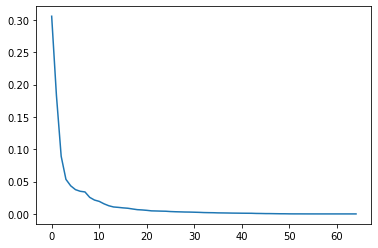

In [11]:
from sklearn.decomposition import PCA   # For PCA
# Sets up the PCA object
pca = PCA()

#Transforms the training data ('tf' = 'transformed')
trn_tf = pca.fit_transform(X_trn)

#Plot the variance explained by each componet
plt.plot(pca.explained_variance_ratio_)

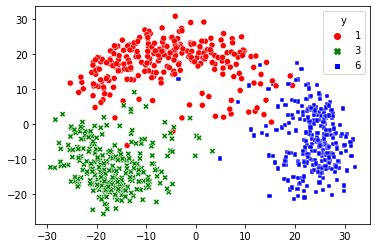

In [12]:
# Plots the projected dataset on the first two principal components and colors by class

sns.scatterplot(
    x=trn_tf[:, 0],
    y=trn_tf[:, 1],
    style=y_trn,
    hue=y_trn,
    palette=['red', 'green', 'blue']
)

In [ ]:
#Get the average log likelihood score of training data (with two decimal places)
print("%.2f" % pca.score(X_trn))

187.76


### TEST MODEL
This phase takes the PCA model developed above and does the following:

1. Transforms the test data on the learned PCA directions
2. Creates a scatter plot along the first two principal directions
3. Finds the average log likelihood score of all test points

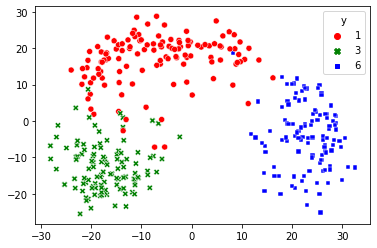

In [13]:
# Transform the test data
tst_tf = pca.transform(X_tst)

#Make a scatter plot along the first two principal directions
# You can see how well the digits are separated on the test set

sns.scatterplot(
    x=tst_tf[:,0],
    y=tst_tf[:,1],
    style=y_tst,
    hue=y_tst,
    palette=['red', 'green', 'blue']

)

In [14]:
# Gets the avervage log likelihood score of testing data to compare with the 
# training data (again with two decimal places)
print("%.2f" % pca.score(X_tst))

182.72


### **LINEAR DISCRIMINAT ANALYSIS (LDA): TRAIN MODEL**

In the training phase, we'll do the following:

1. Set up an LDA object as lda using LinearDiscriminantAnalysis()

2. Fit the model to the training data trn.

3. Transform the data using lda.

4. Plot the transformed data.

5. Find the mean accuracy on the training data

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # For LDA
# Sets up the LinearDiscriminanAnalysis object
lda = LinearDiscriminantAnalysis()

# Fits the training data
lda.fit(X_trn, y_trn)

LinearDiscriminantAnalysis()

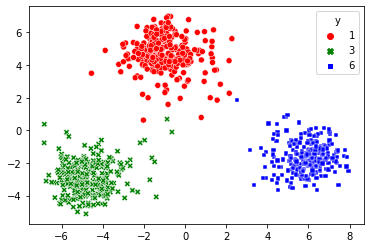

In [16]:
# Transforms training data
trn_tf = lda.transform(X_trn)

# Plots the projected dataset on the first two discriminant functions and colors by class 
sns.scatterplot(
    x=trn_tf[:,0],
    y=trn_tf[:,1],
    style=y_trn,
    hue=y_trn,
    palette=['red', 'green', 'blue']
)

Get the accuracy of the model on the training data using score() and display as percentage with two decimal places

In [17]:
print('Accuracy on training data ='
      + str("{:.2%} ".format(lda.score(X_trn, y_trn))) )

Accuracy on training data =99.63% 


### TEST MODEL

in this phase, we'll take the LDA model developed above and do the following:

1. Transform the test set using the trained model
2. Plots the transformed data.
3. Find the prediction accuracy on the testing data

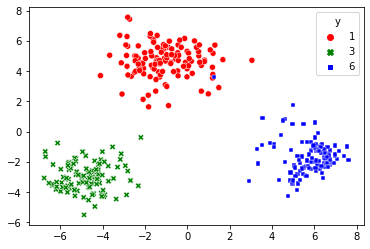

In [18]:
# Uses the trained model to transform the test data
tst_tf = lda.transform(X_tst)

#Plots the projected data set on the first two discriminant functions and colors by class
sns.scatterplot(
    x=tst_tf[:,0],
    y=tst_tf[:,1],
    style=y_tst,
    hue=y_tst,
    palette=['red', 'green', 'blue']
)

Get the accuracy of the model on the data using score() and display as percentange with two decimal places

In [19]:
print('Accuracy on training data ='
      + str("{:.2%} ".format(lda.score(X_tst, y_tst))) )

Accuracy on training data =99.71% 


### **t-SNE: t-DISTRIBUTED STOCHASTIC NEIGHBOR EMBEDDING**

**MODEL DATA**


This phase applies t-SNE to the training data with values of the perplexity parameter and displays embeddings of data

In [22]:
  from sklearn.manifold import TSNE       # For t-SNE

  # Sets up the t-SNE object with 2 components
  tsne = TSNE(
      n_components=2,
      random_state=1
  )

In [23]:
# Displays the t-SNE parameters
tsne.get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'warn',
 'learning_rate': 'warn',
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 30.0,
 'random_state': 1,
 'square_distances': 'legacy',
 'verbose': 0}

**PERPLEXITY = 1**

the one parameter, it is going to be working with, it's called the PERPLEXITY, which has to do with how it combines the high-dimensionality data down into our two-dimensional system. 





/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


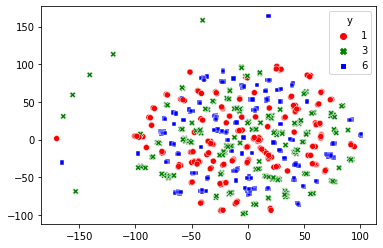

In [26]:
# Set up t-SNE with perplexity = 1
tsne = TSNE(
    n_components=2,
    perplexity=1,
    random_state=1
)

# Transforms the attribute data
X_tf = tsne.fit_transform(X_trn)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x = X_tf[:, 0],
    y = X_tf[:, 1],
    style = y_trn,
    hue = y_trn,
    palette = ['red', 'green', 'blue']
)

**PERPLEXITY = 2**

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


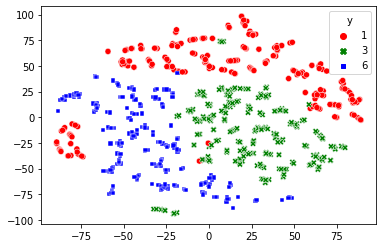

In [27]:
# Set up t-SNE with perplexity = 2
tsne = TSNE(
    n_components=2,
    perplexity=2,
    random_state=1
)

# Transforms the attribute data
X_tf = tsne.fit_transform(X_trn)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x = X_tf[:, 0],
    y = X_tf[:, 1],
    style = y_trn,
    hue = y_trn,
    palette = ['red', 'green', 'blue']
)

**PERPLEXITY = 5**

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


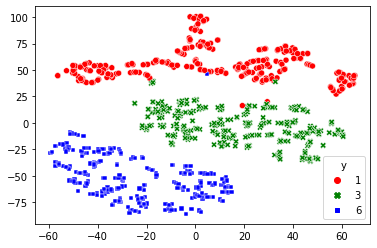

In [29]:
# Set up t-SNE with perplexity = 5
tsne = TSNE(
    n_components=2,
    perplexity=5,
    random_state=1
)

# Transforms the attribute data
X_tf = tsne.fit_transform(X_trn)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x = X_tf[:, 0],
    y = X_tf[:, 1],
    style = y_trn,
    hue = y_trn,
    palette = ['red', 'green', 'blue']
)

**PERPLEXITY = 10**

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


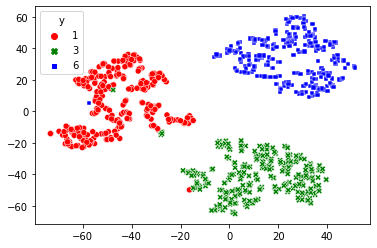

In [30]:
# Set up t-SNE with perplexity = 10
tsne = TSNE(
    n_components=2,
    perplexity=10,
    random_state=1
)

# Transforms the attribute data
X_tf = tsne.fit_transform(X_trn)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x = X_tf[:, 0],
    y = X_tf[:, 1],
    style = y_trn,
    hue = y_trn,
    palette = ['red', 'green', 'blue']
)

**PERPLEXITY = 50**

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


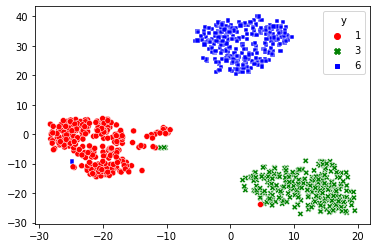

In [31]:
# Set up t-SNE with perplexity = 50
tsne = TSNE(
    n_components=2,
    perplexity=50,
    random_state=1
)

# Transforms the attribute data
X_tf = tsne.fit_transform(X_trn)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x = X_tf[:, 0],
    y = X_tf[:, 1],
    style = y_trn,
    hue = y_trn,
    palette = ['red', 'green', 'blue']
)

TEST MODEL

**PERPLEXITY = 1**

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


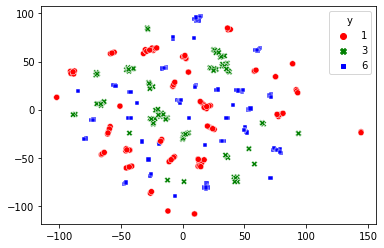

In [32]:
# Set up t-SNE with perplexity = 1
tsne = TSNE(
    n_components=2,
    perplexity=1,
    random_state=1
)

# Transforms the attribute data
X_tf = tsne.fit_transform(X_tst)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x = X_tf[:, 0],
    y = X_tf[:, 1],
    style = y_tst,
    hue = y_tst,
    palette = ['red', 'green', 'blue']
)

**PERPLEXITY = 2**

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


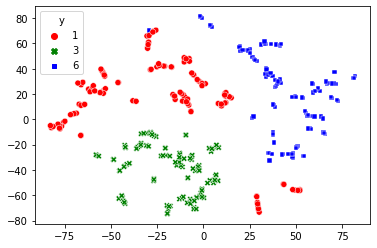

In [34]:
# Set up t-SNE with perplexity = 2
tsne = TSNE(
    n_components=2,
    perplexity=2,
    random_state=1
)

# Transforms the attribute data
X_tf = tsne.fit_transform(X_tst)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x = X_tf[:, 0],
    y = X_tf[:, 1],
    style = y_tst,
    hue = y_tst,
    palette = ['red', 'green', 'blue']
)

**PERPLEXITY = 5**

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


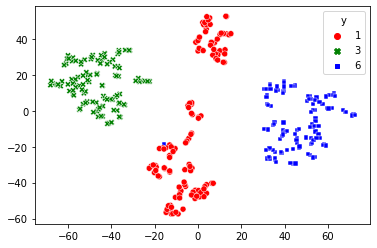

In [35]:
# Set up t-SNE with perplexity = 5
tsne = TSNE(
    n_components=2,
    perplexity=5,
    random_state=1
)

# Transforms the attribute data
X_tf = tsne.fit_transform(X_tst)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x = X_tf[:, 0],
    y = X_tf[:, 1],
    style = y_tst,
    hue = y_tst,
    palette = ['red', 'green', 'blue']
)

**PERPLEXITY = 10**

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


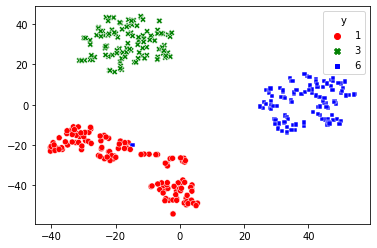

In [36]:
# Set up t-SNE with perplexity = 10
tsne = TSNE(
    n_components=2,
    perplexity=10,
    random_state=1
)

# Transforms the attribute data
X_tf = tsne.fit_transform(X_tst)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x = X_tf[:, 0],
    y = X_tf[:, 1],
    style = y_tst,
    hue = y_tst,
    palette = ['red', 'green', 'blue']
)

**PERPLEXITY = 50**

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


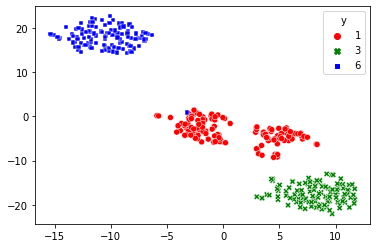

In [37]:
# Set up t-SNE with perplexity = 50
tsne = TSNE(
    n_components=2,
    perplexity=50,
    random_state=1
)

# Transforms the attribute data
X_tf = tsne.fit_transform(X_tst)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x = X_tf[:, 0],
    y = X_tf[:, 1],
    style = y_tst,
    hue = y_tst,
    palette = ['red', 'green', 'blue']
)